<a href="https://colab.research.google.com/github/aditi-dhakal/SparksFoundation_Aditi-Dhakal/blob/main/Task1_sparksfoundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

url = "http://bit.ly/w-data"
ds = pd.read_csv(url)
print("Data Imported Successfully")
ds.head(25)     

Data Imported Successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
ds.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
ds.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
ds.shape

(25, 2)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
ds.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
ds.isnull().sum()

Hours     0
Scores    0
dtype: int64

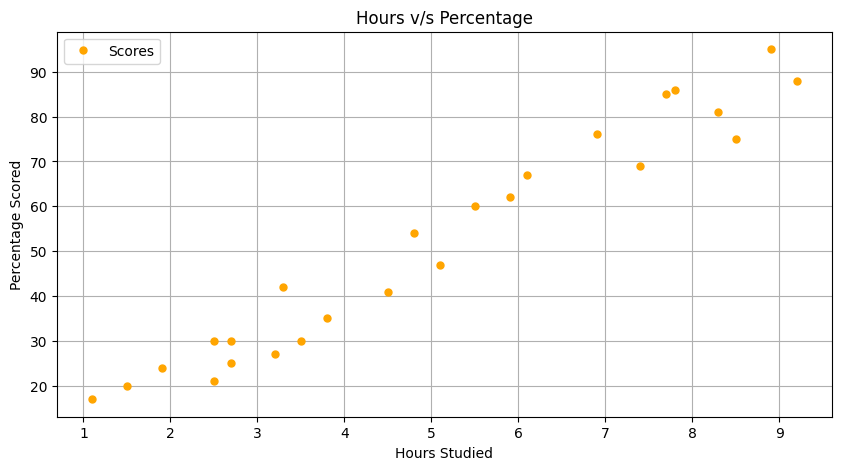

In [9]:
plt.rcParams['figure.figsize']=[10, 5]
ds.plot(x="Hours", y="Scores", style="." ,color="orange", markersize=10)
plt.title("Hours v/s Percentage")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.show()
     

In [10]:
X = ds.iloc[:, :1].values
Y = ds.iloc[:, 1:].values

In [12]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
Y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
     

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)
print("Training Complete")

Training Complete


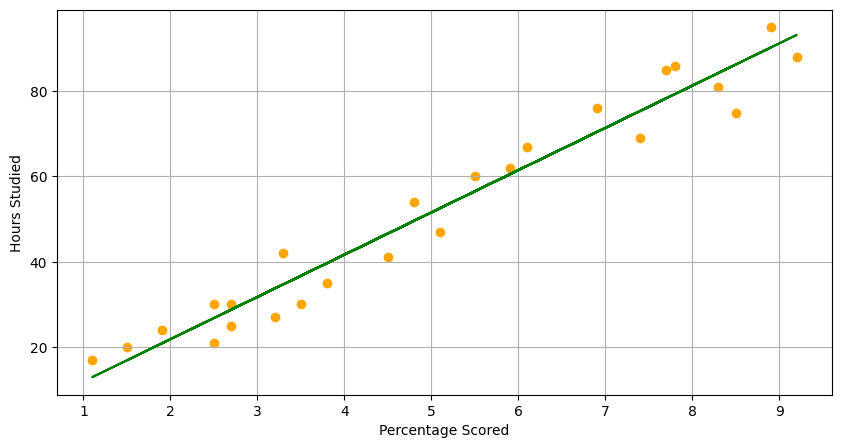

In [16]:
line = model.coef_*X+model.intercept_
plt.rcParams['figure.figsize']=[10, 5]
plt.scatter(X, Y, color="orange")
plt.plot(X, line, color="green")
plt.xlabel("Percentage Scored")
plt.ylabel("Hours Studied")
plt.grid()
plt.show()
     


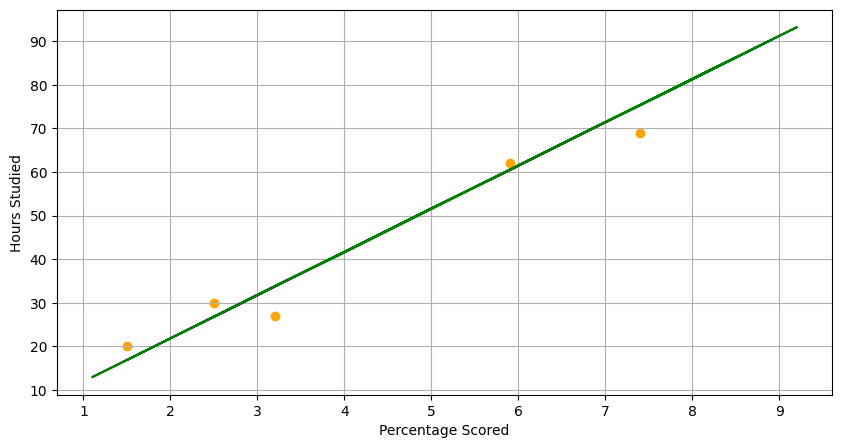

In [17]:
line = model.coef_*X+model.intercept_
plt.rcParams['figure.figsize']=[10, 5]
plt.scatter(X_test, Y_test, color="orange")
plt.plot(X, line, color="green")
plt.xlabel("Percentage Scored")
plt.ylabel("Hours Studied")
plt.grid()
plt.show()

In [18]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [19]:
y_pred = model.predict(X_test)

In [20]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [21]:
Y_test

array([[20],
       [27],
       [69],
       [30],
       [62]])

In [22]:
df = pd.DataFrame({"Actual":[Y_test],'Predicted':[y_pred]})

In [23]:
df

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398023], [33.732260779489835], [..."


In [24]:
hours = 9.25
own_pred = model.predict([[hours]])
print("Number of Hours = {}".format([[hours]]))
print("Prediction Score = {}".format(own_pred[0]))
     

Number of Hours = [[9.25]]
Prediction Score = [93.69173249]


In [25]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(Y_test,y_pred))
     

Mean Absolute Error: 4.183859899002982
